# Quick Port of Wrapper Test to Ray
New files:
- `wrapper_ray.py`: clone of wrapper with changes to work with Ray
- `ray_port/car_stop_model.py`: clone of `models/car_stop_model.py` with changes to work with Ray
- `ray_port/ray_util.py`: serialization/deserialization functions for `FLAGS`

The biggest issue I encountered was serialization of `FLAGS`. Provided Ray serializations using pickle or dict didn't work. I also had trouble registering a custom serializer/deserializer with Ray. In the end, my workaround was to create a custom serializer/deseralizer and store a serialized `FLAGS` as a global variable. In any function called remotely, I could then deserialize to reconstruct `FLAGS`. The workaround isn't elegant, but it is effective. Example:
```python
import tensorflow as tf
from ray_port import ray_util

FLAGS = tf.app.flags.FLAGS
flags_serialized = ray_util.flags_serializer(FLAGS)

@ray.remote
def f():
    FLAGS = ray_util.flags_deserializer(flags_serialized)
    ...
```

In [ ]:
import wrapper_ray
import tensorflow as tf
from tensorflow.core.example import example_pb2
from cStringIO import StringIO
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline
import numpy as np
import ray

In [2]:
ray.init()

Waiting for redis server at 127.0.0.1:28385 to respond...
Waiting for redis server at 127.0.0.1:23709 to respond...
Starting local scheduler with 16 CPUs, 0 GPUs

View the web UI at http://localhost:8892/notebooks/ray_ui51326.ipynb?token=c1502ad341a0d5e29105cfa15bea7314f63ba8328853ee26



{'local_scheduler_socket_names': ['/tmp/scheduler79450104'],
 'node_ip_address': '127.0.0.1',
 'object_store_addresses': [ObjectStoreAddress(name='/tmp/plasma_store33816898', manager_name='/tmp/plasma_manager99016399', manager_port=49610)],
 'redis_address': '127.0.0.1:28385',
 'webui_url': 'http://localhost:8892/notebooks/ray_ui51326.ipynb?token=c1502ad341a0d5e29105cfa15bea7314f63ba8328853ee26'}

In [3]:
FLAGS = wrapper_ray.FLAGS

In [16]:
a = wrapper_ray.Wrapper.remote("discrete_tcnn1", 
            "/home/ubuntu/BDD_Driving_Model/data/discrete_tcnn1/model.ckpt-126001.bestmodel",
            20)

[array([[ 2.55629849,  3.42181253,  0.286553  ,  0.66659689, -3.49530244,
        -3.50437617]], dtype=float32)]


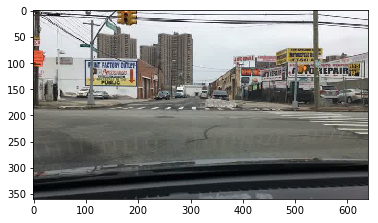

In [15]:
# Get prediction from JPG image (video frame)
dt = Image.open("/home/ubuntu/Pictures/0001.jpg")
imshow(np.asarray(dt))
b = a.observe_a_frame.remote(np.asarray(dt))
print ray.get(b)

In [17]:
# Get prediction from tfrecords like in original wrapper
example = example_pb2.Example()
in_file = "/home/ubuntu/samples-1k/tfrecords/08022699-d03af7f6.tfrecords"

count = 0
for example_serialized in tf.python_io.tf_record_iterator(in_file):
    example.ParseFromString(example_serialized)
    feature_map = example.features.feature
    encoded = feature_map['image/encoded'].bytes_list.value
    print count
    count += 1

0


[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]


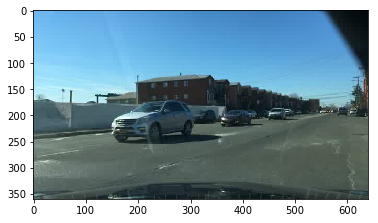

In [18]:
file_jpgdata = StringIO(encoded[0])
dt = Image.open(file_jpgdata)
imshow(np.asarray(dt))
b = a.observe_a_frame.remote(np.asarray(dt))
print ray.get(b)

In [19]:
for i in range(len(encoded)):
    if i % 5 == 0:
        file_jpgdata = StringIO(encoded[0])
        dt = Image.open(file_jpgdata)
        arr = np.asarray(dt)
        out = a.observe_a_frame.remote(arr)
        print ray.get(out)
        print i/5

[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
0
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
1
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
2
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
3
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
4
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
5
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
6
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
7
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
      

[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
71
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
72
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
73
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
74
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
75
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
76
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
77
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155,
        -4.85403299]], dtype=float32)]
78
[array([[ 1.81182146,  2.07716513,  1.6369617 ,  4.12814426, -4.68583155